In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


In [3]:
df= pd.read_csv('ds_salaries (ML).csv')

In [4]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<Axes: >

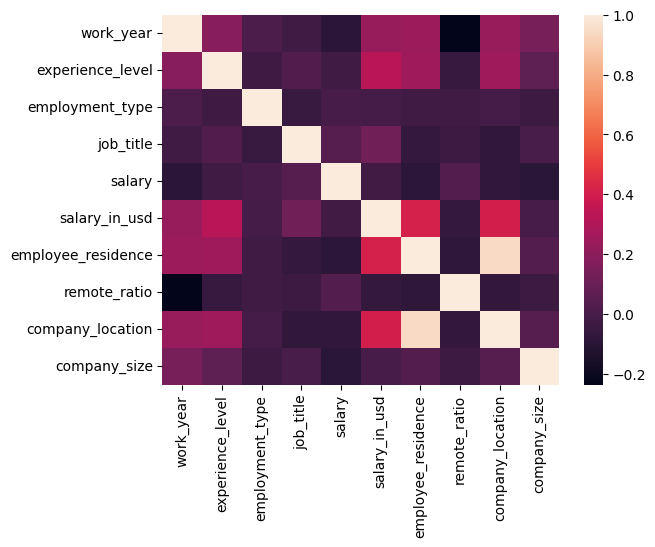

In [66]:
sns.heatmap(df.corr())

In [15]:
## salary currency is redundant drop that column 
df=df.drop(columns=['salary_currency'])

KeyError: "['salary_currency'] not found in axis"

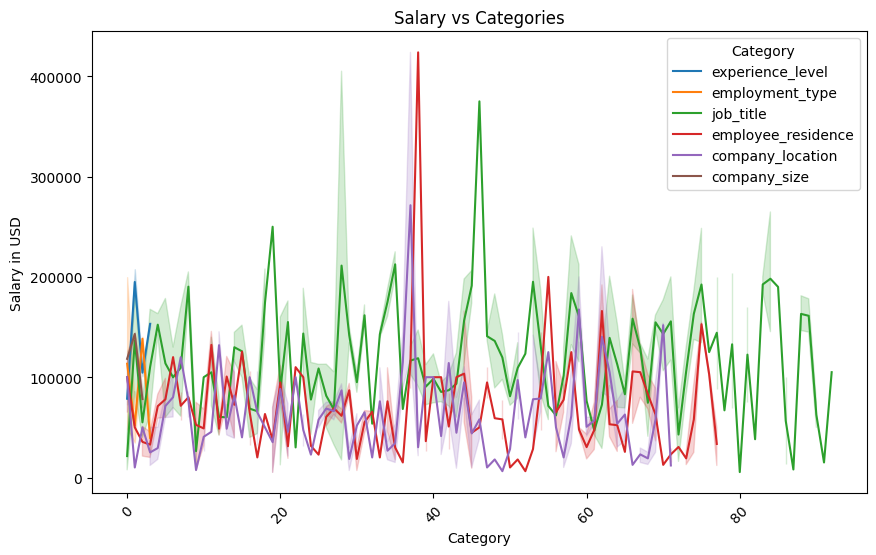

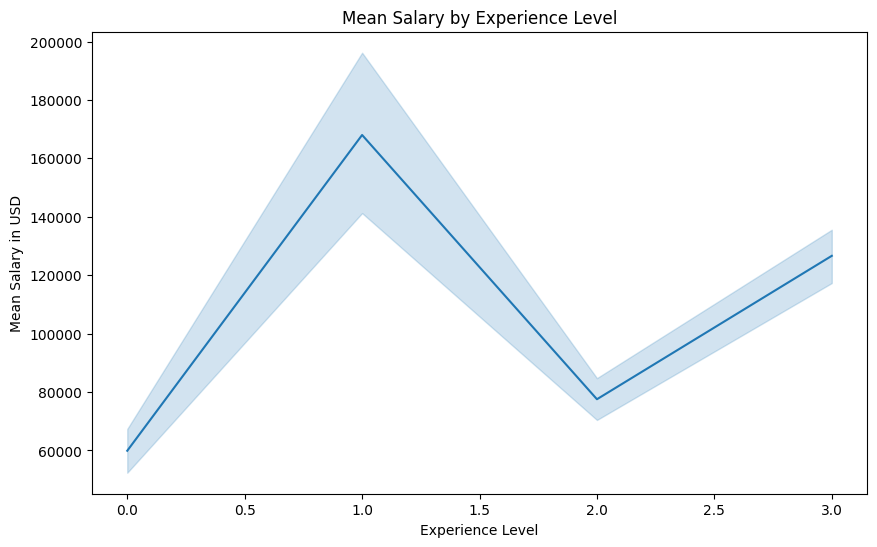

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_long = pd.melt(df, id_vars=['salary_in_usd'], value_vars=['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size'],
                  var_name='Category', value_name='Category_Value')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Category_Value', y='salary_in_usd', hue='Category', data=df_long)
plt.title('Salary vs Categories')
plt.xlabel('Category')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()


mean_salary = df.groupby(['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='experience_level', y='salary_in_usd', data=mean_salary)
plt.title('Mean Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary in USD')
plt.xticks(rotation=45)  
plt.show()


In [22]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,85847,26,1.105918,25,0
1,2023,2,0,66,30000,30000,75,1.105918,70,2
2,2023,2,0,66,25500,25500,75,1.105918,70,2
3,2023,3,2,47,175000,175000,11,1.105918,12,1
4,2023,3,2,47,120000,120000,11,1.105918,12,1


In [23]:
# apply label encoding 
label_encoder=LabelEncoder()
catgorical_columns=['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

for i in catgorical_columns:
    df[i]=label_encoder.fit_transform(df[i])

In [24]:
scaler=StandardScaler()
df['remote_ratio']=scaler.fit_transform(df[['remote_ratio']])

In [ ]:
# split data
x = df.drop(columns=['salary', 'salary_in_usd'])
y = df['salary_in_usd']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [45]:
y_pred=model.predict(x_test)

In [48]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :", mae)
print("Mean Squared Error :", mse)
print("R-squared :", r2*100)

Mean Absolute Error : 41582.71615452774
Mean Squared Error : 2849497531.790538
R-squared : 27.820434963137906


In [54]:
from sklearn.metrics import confusion_matrix, classification_report


In [52]:
# Predict the exited status on the test set
y_pred = model.predict(x_test)
y_pred


array([ 96977.25805732, 155896.34984566, 155945.27897457, 152253.35352127,
       116251.65734062,  38931.96922712, 164539.02789568, 109707.79495602,
        65322.65623523, 175432.4542513 ,  91996.64928915, 149013.09856645,
       157606.84748756, 107334.64810597, 153645.60154006, 106342.38769411,
       101699.169524  , 155945.27897457, 149013.09856645, 164539.02789568,
       142585.78724194, 145051.85261895, 159857.59579316, 134660.57662991,
       164539.02789568, 133992.03832083, 147880.63873915, 155896.34984566,
       127481.6429873 , 138673.47042335, 143247.33092788, 155896.34984566,
       167063.73574177,  72219.47088546,  57368.56125395, 129760.66704148,
        81662.79576866,  49775.80005077, 153645.60154006, 146762.35026084,
       104611.46151554,  75062.82338415, 129216.58216914,  66637.69504172,
       164632.2471072 , 153645.60154006,  93511.16785326, 146762.35026084,
       140875.28960005, 116816.35019401, 104956.7276466 ,  89095.24552649,
       164539.02789568, 1

In [57]:
print(y_test.shape)
print(y_pred.shape)
print(y_test.head())  # Check the first few values
print(y_pred[:10])  # Check the first few predicted values


(751,)
(751,)
2148    168000
1044    179975
3321    144000
439     222200
3519    230000
Name: salary_in_usd, dtype: int64
[ 96977.25805732 155896.34984566 155945.27897457 152253.35352127
 116251.65734062  38931.96922712 164539.02789568 109707.79495602
  65322.65623523 175432.4542513 ]


In [58]:

y_test = y_test.ravel()  
y_pred = y_pred.ravel()


C:\Users\advai\AppData\Local\Temp\ipykernel_8984\2537573377.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()  # Or use y_test.flatten()


In [59]:
print(np.unique(y_test))
print(np.unique(y_pred))


[  5409   5723   6072   6359   7000   8000   8050  10000  12000  12888
  15000  17022  20000  20670  25000  27317  28016  28369  29751  29944
  30523  31795  33000  35093  36773  37558  37824  38631  39925  40000
  40663  40777  41689  42026  42197  45050  45555  45600  46000  46178
  46759  47280  48289  49253  49268  50000  51000  51508  52008  52533
  54000  54094  54634  54685  55000  57872  58000  59020  59102  60000
  61300  61566  61800  62726  63000  64385  65000  65062  66000  67723
  68293  68318  69741  70000  70500  72000  72914  72946  73546  73880
  75000  75648  76814  76958  77684  78000  78990  79000  79833  80000
  81666  82000  82528  82920  83500  84000  84053  84900  85000  85066
  85500  85847  86193  87000  89306  90000  90320  90700  90734  92000
  92250  92350  92700  94000  94500  94665  95000  97750  98200  98506
  99000  99050  99100  99450 100000 102100 102500 102544 102772 103691
 104000 104500 104611 104663 105000 105200 106000 106020 106500 106800
 10690

In [62]:
def sal_pred(input_data):
    input_df=pd.DataFrame([input_data],columns=x.columns)
    input_df['remote_ratio'] = scaler.transform(input_df[['remote_ratio']])
    predicted_salary = model.predict(input_df)
    return predicted_salary[0]


In [63]:
input_data = {
    'work_year': 2023,
    'experience_level': 1,  
    'employment_type': 1,  
    'job_title': 2, 
    'employee_residence': 1, 
    'company_location': 1, 
    'company_size': 1,  
    'remote_ratio': 100, 
}
predicted_salary = sal_pred(input_data)
print(f"The predicted salary is: ${predicted_salary:,.2f}")

The predicted salary is: $134,280.23
